In [103]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import geo_tools, tidetools, viz_tools, loadDataFRP
import matplotlib.cm as cm
%matplotlib inline

In [2]:
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')

In [62]:
Bathymetry = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(Bathymetry)

In [65]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
tmask = mesh.variables['tmask'][:]

In [4]:
stationdata, casts = loadDataFRP.loadDataFRP_SSGrid()

(40, 898, 398) 415 337 1.0
(40, 898, 398) 415 337 2.0
(40, 898, 398) 442 259 3.0


/home/vdo/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3883: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  check = self.filled(0).__eq__(other)


(40, 898, 398) 438 268 4.0
(40, 898, 398) 434 278 5.0
(40, 898, 398) 432 281 6.0
(40, 898, 398) 430 285 7.0
(40, 898, 398) 428 289 8.0
(40, 898, 398) 427 291 9.0
(40, 898, 398) 412 291 10.0
(40, 898, 398) 443 258 11.0
(40, 898, 398) 438 268 12.0
(40, 898, 398) 434 278 13.0
(40, 898, 398) 432 281 14.1
(40, 898, 398) 432 281 14.2
(40, 898, 398) 432 287 15.0
(40, 898, 398) 432 292 16.0
(40, 898, 398) 427 291 17.0
(40, 898, 398) 415 337 18.0


In [27]:
stationdata[['Station', 'Date_UTC', 'Time_UTC_hhmmss']]

,Station,Date_UTC,Time_UTC_hhmmss
0,1.0,20170410,17:54:17
1,2.0,20170410,18:05:11
2,3.0,20170410,19:44:22
3,4.0,20170410,20:25:40
4,5.0,20170410,21:05:12
5,6.0,20170410,21:40:15
6,7.0,20170410,21:58:48
7,8.0,20170410,22:30:56
8,9.0,20170410,22:45:20
9,10.0,20170531,17:19:23


In [60]:
max_dsdz = np.array([])
depth_of_max_dsdz = np.array([])
for n in range(1,19):
    if n == 14:
        depths = casts[14.1].dCast['depth_m']
        dz = casts[14.1].dCast['depth_m'].values[1:] - casts[14.1].dCast['depth_m'].values[:-1]
        ds = casts[14.1].dCast['gsw_srA0'].values[1:] - casts[14.1].dCast['gsw_srA0'].values[:-1]
        depth_of_max_dsdz = np.append(depth_of_max_dsdz, 
                                      (depths[np.nanargmax(ds / dz)] 
                                       + depths[np.nanargmax(ds / dz) + 1])/2) 
        max_dsdz = np.append(max_dsdz, np.nanmax(ds / dz))
        depths = casts[14.2].uCast['depth_m']
        dz = casts[14.2].uCast['depth_m'].values[1:] - casts[14.2].uCast['depth_m'].values[:-1]
        ds = casts[14.2].uCast['gsw_srA0'].values[1:] - casts[14.2].uCast['gsw_srA0'].values[:-1]
        depth_of_max_dsdz = np.append(depth_of_max_dsdz, 
                                      (depths[np.nanargmax(ds / dz)] 
                                       + depths[np.nanargmax(ds / dz) + 1])/2) 
        max_dsdz = np.append(max_dsdz, np.nanmax(ds / dz))
    else:
        depths = casts[n].dCast['depth_m']
        dz = casts[n].dCast['depth_m'].values[1:] - casts[n].dCast['depth_m'].values[:-1]
        ds = casts[n].dCast['gsw_srA0'].values[1:] - casts[n].dCast['gsw_srA0'].values[:-1]
        depth_of_max_dsdz = np.append(depth_of_max_dsdz, 
                                      (depths[np.nanargmax(ds / dz)] 
                                       + depths[np.nanargmax(ds / dz) + 1])/2) 
        max_dsdz = np.append(max_dsdz, np.nanmax(ds / dz))
        depths = casts[n].uCast['depth_m']
        dz = casts[n].uCast['depth_m'].values[1:] - casts[n].uCast['depth_m'].values[:-1]
        ds = casts[n].uCast['gsw_srA0'].values[1:] - casts[n].uCast['gsw_srA0'].values[:-1]
        depth_of_max_dsdz = np.append(depth_of_max_dsdz, 
                                      (depths[np.nanargmax(ds / dz)] 
                                       + depths[np.nanargmax(ds / dz) + 1])/2) 
        max_dsdz = np.append(max_dsdz, np.nanmax(ds / dz))
print(max_dsdz)
print(depth_of_max_dsdz)

[  2.54296153e-01   2.37629285e-01   1.30744024e-01   6.30877904e-02
   5.72300684e-01   5.66630045e-01   1.41610612e+00   8.58189202e-01
   4.49425967e+00   3.62388824e+00   4.97102531e+00   3.80620648e+00
   4.89693031e-01   1.48976142e+00   3.45346092e+00   8.78231892e-01
   8.34433050e+00   6.37323388e+00   3.56028501e+00   3.12093266e+00
   1.65439135e+00   1.04003063e+00   7.74946046e+00   5.05542847e+00
   3.26381849e+00   3.47950290e+00   3.87288871e+00   3.30430298e+00
   5.97097529e+00   4.55471703e+00   7.44537821e+00   6.21241326e+00
   4.72306170e+00   5.00925346e+00   1.45078415e-05   9.14688210e-05]
[  9.00183487   8.00092983   2.00000715   2.00000715   4.00005054
   5.00011063   3.00002098   3.00002098   2.00000715   3.00002098
   2.00000715   2.00000715   6.00023079   2.00000715   2.00000715
   2.00000715   2.00000715   2.00000715   4.00005054   4.00005054
   3.00002098   5.00011063   2.00000715   2.00000715   5.00011063
   4.00005054   5.00011063   4.00005054   4.0000

In [151]:
depths_base = np.array([])
max_dsdz_base = np.array([])
depths_a = np.array([])
max_dsdz_a = np.array([])
depths_b = np.array([])
max_dsdz_b = np.array([])
for n in range(19):
    station = stationdata.iloc[[n]]
    cast = casts[station['Station'].values[0]]
    Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                    station['LatDecDeg'].values[0],
                                                    X, Y, land_mask = bathy.mask)
    if n == 13:
        shape_depth = cast.dCast['depth_m'].values.shape[0]
    else:
        shape_depth = cast.uCast['depth_m'].values.shape[0]
    if n < 9:
        base=nc.Dataset(
            '/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset(
            '/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset(
            '/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    else:
        base=nc.Dataset(
            '/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset(
            '/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset(
            '/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    deptht = base.variables['deptht'][:shape_depth]
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    dz = deptht[1:] - deptht[:-1]
    ds_base = base_sal[1:] - base_sal[:-1]
    ds_a = a_sal[1:] - a_sal[:-1]
    ds_b = b_sal[1:] - b_sal[:-1]
    if n == 13:
        depths_base = np.append(depths_base, (deptht[np.nanargmax(ds_base / dz)] 
                                            + deptht[np.nanargmax(ds_base / dz) + 1])/2) 
        max_dsdz_base = np.append(max_dsdz_base, np.nanmax(ds_base / dz))
        depths_a = np.append(depths_a, (deptht[np.nanargmax(ds_a / dz)] 
                                        + deptht[np.nanargmax(ds_a / dz) + 1])/2)
        max_dsdz_a = np.append(max_dsdz_a, np.nanmax(ds_a / dz))
        depths_b = np.append(depths_b, (deptht[np.nanargmax(ds_b / dz)] 
                                        + deptht[np.nanargmax(ds_b / dz) + 1])/2)
        max_dsdz_b = np.append(max_dsdz_b, np.nanmax(ds_b / dz))
    elif n == 14:
        depths_base = np.append(depths_base, (deptht[np.nanargmax(ds_base / dz)] 
                                            + deptht[np.nanargmax(ds_base / dz) + 1])/2) 
        max_dsdz_base = np.append(max_dsdz_base, np.nanmax(ds_base / dz))
        depths_a = np.append(depths_a, (deptht[np.nanargmax(ds_a / dz)] 
                                        + deptht[np.nanargmax(ds_a / dz) + 1])/2)
        max_dsdz_a = np.append(max_dsdz_a, np.nanmax(ds_a / dz))
        depths_b = np.append(depths_b, (deptht[np.nanargmax(ds_b / dz)] 
                                        + deptht[np.nanargmax(ds_b / dz) + 1])/2)
        max_dsdz_b = np.append(max_dsdz_b, np.nanmax(ds_b / dz))
    else:    
        depths_base = np.append(depths_base, (deptht[np.nanargmax(ds_base / dz)] 
                                            + deptht[np.nanargmax(ds_base / dz) + 1])/2) 
        max_dsdz_base = np.append(max_dsdz_base, np.nanmax(ds_base / dz))
        depths_base = np.append(depths_base, (deptht[np.nanargmax(ds_base / dz)] 
                                            + deptht[np.nanargmax(ds_base / dz) + 1])/2) 
        max_dsdz_base = np.append(max_dsdz_base, np.nanmax(ds_base / dz))
        depths_a = np.append(depths_a, (deptht[np.nanargmax(ds_a / dz)] 
                                        + deptht[np.nanargmax(ds_a / dz) + 1])/2)
        max_dsdz_a = np.append(max_dsdz_a, np.nanmax(ds_a / dz))
        depths_a = np.append(depths_a, (deptht[np.nanargmax(ds_a / dz)] 
                                        + deptht[np.nanargmax(ds_a / dz) + 1])/2)
        max_dsdz_a = np.append(max_dsdz_a, np.nanmax(ds_a / dz))
        depths_b = np.append(depths_b, (deptht[np.nanargmax(ds_b / dz)] 
                                        + deptht[np.nanargmax(ds_b / dz) + 1])/2)
        max_dsdz_b = np.append(max_dsdz_b, np.nanmax(ds_b / dz))
        depths_b = np.append(depths_b, (deptht[np.nanargmax(ds_b / dz)] 
                                        + deptht[np.nanargmax(ds_b / dz) + 1])/2)
        max_dsdz_b = np.append(max_dsdz_b, np.nanmax(ds_b / dz))

base case bias =  -0.029609549186
test a bias =  0.0927777573718
test b bias =  -0.0380832070854


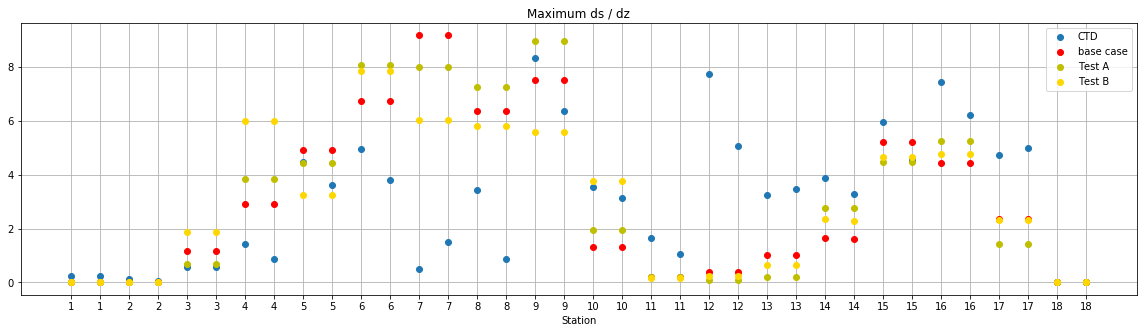

In [152]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(max_dsdz, 'o', label = 'CTD')
ax.plot(max_dsdz_base, 'ro', label = 'base case')
ax.plot(max_dsdz_a, 'yo', label = 'Test A')
ax.plot(max_dsdz_b, 'o', color = 'gold', label = 'Test B')
ax.set_xlabel('Station')
labels = [n//2 + 1 for n in range(36)]
plt.xticks(np.arange(36), labels);
ax.grid('on')
ax.set_title('Maximum ds / dz')
ax.legend();
print('base case bias =  ' + str(-np.mean(max_dsdz) + np.mean(max_dsdz_base)))
print('test a bias =  ' + str(-np.mean(max_dsdz) + np.mean(max_dsdz_a)))
print('test b bias =  ' + str(-np.mean(max_dsdz) + np.mean(max_dsdz_b)))

base case bias =  0.0572419961294
test a bias =  0.0645336972343
test b bias =  0.357569111718


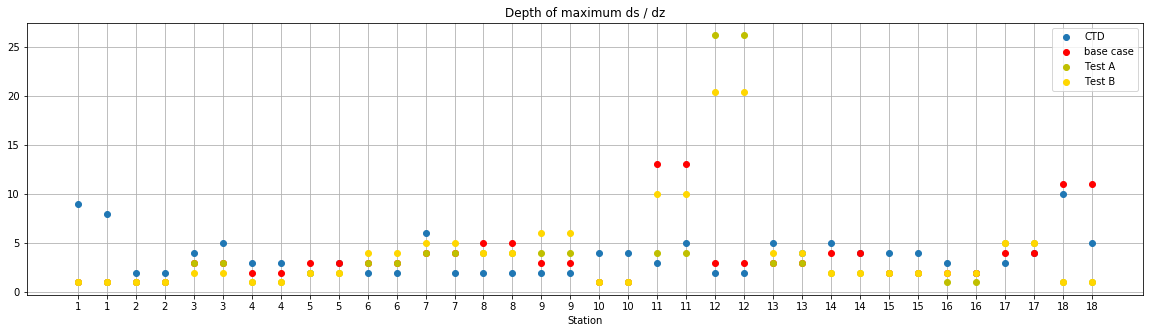

In [153]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(depth_of_max_dsdz, 'o', label = 'CTD')
ax.plot(depths_base, 'ro', label = 'base case')
ax.plot(depths_a, 'yo', label = 'Test A')
ax.plot(depths_b, 'o', color = 'gold', label = 'Test B')
ax.set_xlabel('Station')
labels = [n//2 + 1 for n in range(36)]
plt.xticks(np.arange(36), labels);
ax.grid('on')
ax.set_title('Depth of maximum ds / dz')
ax.legend();
print('base case bias =  ' + str(-np.mean(depth_of_max_dsdz) + np.mean(depths_base)))
print('test a bias =  ' + str(-np.mean(depth_of_max_dsdz) + np.mean(depths_a)))
print('test b bias =  ' + str(-np.mean(depth_of_max_dsdz) + np.mean(depths_b)))

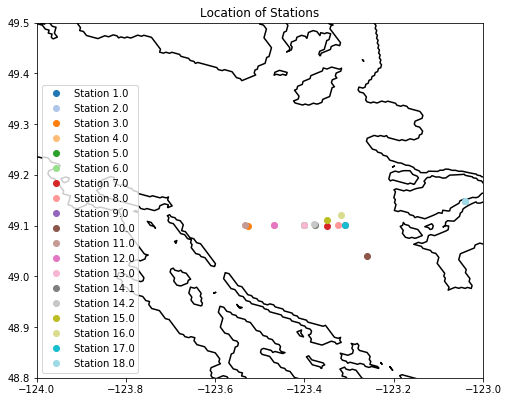

In [126]:
colours = cm.tab20(np.linspace(0,1,19))
fig, ax = plt.subplots(figsize = (8,8))
for n in range(19):
    station = stationdata.iloc[[n]]
    cast = casts[station['Station'].values[0]]
    ax.plot(station['LonDecDeg'].values[0], station['LatDecDeg'].values[0], 'o',
            color = colours[n], label = 'Station ' + str(station['Station'].values[0]))
viz_tools.plot_coastline(ax, Bathymetry, coords = 'map')
viz_tools.set_aspect(ax)
ax.legend(loc = 'lower left')
ax.set_xlim(-124, -123)
ax.set_ylim(48.8, 49.5)
ax.set_title('Location of Stations');

In [154]:
lons = np.array([])
for n in range(19):
    if n == 13:
        lons = np.append(lons, stationdata['LonDecDeg'][n])
    elif n == 14:
        lons = np.append(lons, stationdata['LonDecDeg'][n])
    else:
        lons = np.append(lons, stationdata['LonDecDeg'][n])
        lons = np.append(lons, stationdata['LonDecDeg'][n])
print(lons.shape)
lons

(36,)


array([-123.04      , -123.04      , -123.04      , -123.04      ,
       -123.5266    , -123.5266    , -123.46701667, -123.46701667,
       -123.40041667, -123.40041667, -123.3755    , -123.3755    ,
       -123.35      , -123.35      , -123.32466667, -123.32466667,
       -123.309     , -123.309     , -123.25965   , -123.25965   ,
       -123.53372   , -123.53372   , -123.46722   , -123.46722   ,
       -123.40012   , -123.40012   , -123.37567   , -123.37767   ,
       -123.34852   , -123.34852   , -123.3185    , -123.3185    ,
       -123.30883   , -123.30883   , -123.03928   , -123.03928   ])

base case bias =  1.98397170126
test a bias =  2.25364692297
test b bias =  1.71250687659


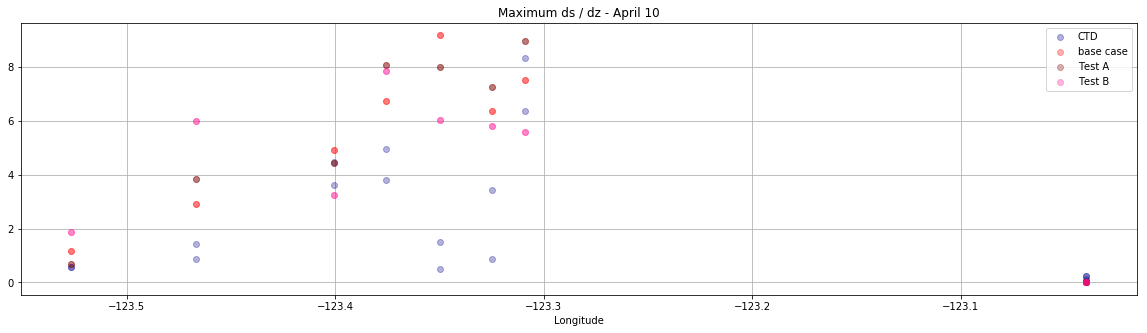

In [157]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(lons[:18], max_dsdz[:18], 'o', label = 'CTD', color = 'darkblue', alpha = 0.3)
ax.plot(lons[:18], max_dsdz_base[:18], 'ro', label = 'base case', alpha = 0.3)
ax.plot(lons[:18], max_dsdz_a[:18], 'o' ,color = 'maroon',  label = 'Test A', alpha = 0.3)
ax.plot(lons[:18], max_dsdz_b[:18], 'o', color = 'deeppink', label = 'Test B', alpha = 0.3)
ax.set_xlabel('Longitude')
ax.grid('on')
ax.set_title('Maximum ds / dz - April 10')
ax.legend();
print('base case bias =  ' + str(-np.mean(max_dsdz[:18]) + np.mean(max_dsdz_base[:18])))
print('test a bias =  ' + str(-np.mean(max_dsdz[:18]) + np.mean(max_dsdz_a[:18])))
print('test b bias =  ' + str(-np.mean(max_dsdz[:18]) + np.mean(max_dsdz_b[:18])))

base case bias =  -2.04319079964
test a bias =  -2.06809140823
test b bias =  -1.78867329076


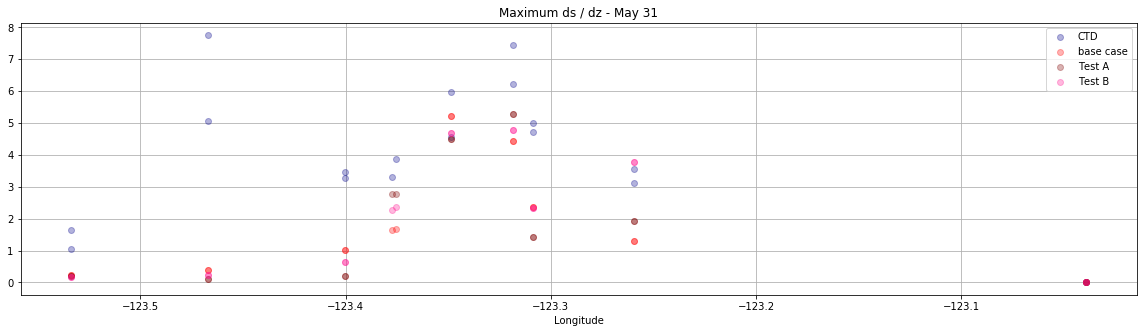

In [158]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(lons[18:], max_dsdz[18:], 'o', label = 'CTD', color = 'darkblue', alpha = 0.3)
ax.plot(lons[18:], max_dsdz_base[18:], 'ro', label = 'base case', alpha = 0.3)
ax.plot(lons[18:], max_dsdz_a[18:], 'o' ,color = 'maroon',  label = 'Test A', alpha = 0.3)
ax.plot(lons[18:], max_dsdz_b[18:], 'o', color = 'deeppink', label = 'Test B', alpha = 0.3)
ax.set_xlabel('Longitude')
ax.grid('on')
ax.set_title('Maximum ds / dz - May 31')
ax.legend();
print('base case bias =  ' + str(-np.mean(max_dsdz[18:]) + np.mean(max_dsdz_base[18:])))
print('test a bias =  ' + str(-np.mean(max_dsdz[18:]) + np.mean(max_dsdz_a[18:])))
print('test b bias =  ' + str(-np.mean(max_dsdz[18:]) + np.mean(max_dsdz_b[18:])))

base case bias =  -0.611265553368
test a bias =  -0.8334933122
test b bias =  -0.500131527583


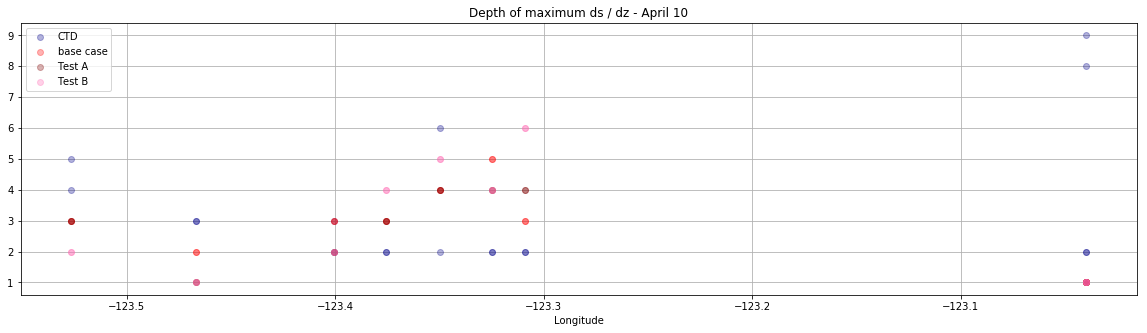

In [159]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(lons[:18], depth_of_max_dsdz[:18], 'o',color = 'darkblue',  label = 'CTD', alpha = 0.3)
ax.plot(lons[:18], depths_base[:18], 'ro', label = 'base case', alpha = 0.3)
ax.plot(lons[:18], depths_a[:18], 'o', color = 'maroon', label = 'Test A', alpha = 0.3)
ax.plot(lons[:18], depths_b[:18], 'o', color = 'hotpink', label = 'Test B', alpha = 0.3)
ax.set_xlabel('Longitude')
ax.grid('on')
ax.set_title('Depth of maximum ds / dz - April 10')
ax.legend();
print('base case bias =  ' + str(-np.mean(depth_of_max_dsdz[:18]) + np.mean(depths_base[:18])))
print('test a bias =  ' + str(-np.mean(depth_of_max_dsdz[:18]) + np.mean(depths_a[:18])))
print('test b bias =  ' + str(-np.mean(depth_of_max_dsdz[:18]) + np.mean(depths_b[:18])))

base case bias =  0.725749545627
test a bias =  0.962560706668
test b bias =  1.21526975102


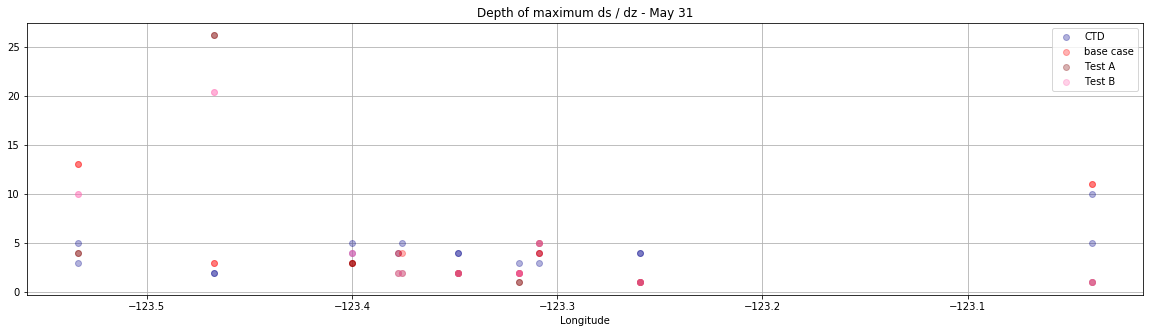

In [160]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(lons[18:], depth_of_max_dsdz[18:], 'o',color = 'darkblue',  label = 'CTD', alpha = 0.3)
ax.plot(lons[18:], depths_base[18:], 'ro', label = 'base case', alpha = 0.3)
ax.plot(lons[18:], depths_a[18:], 'o', color = 'maroon', label = 'Test A', alpha = 0.3)
ax.plot(lons[18:], depths_b[18:], 'o', color = 'hotpink', label = 'Test B', alpha = 0.3)
ax.set_xlabel('Longitude')
ax.grid('on')
ax.set_title('Depth of maximum ds / dz - May 31')
ax.legend();
print('base case bias =  ' + str(-np.mean(depth_of_max_dsdz[18:]) + np.mean(depths_base[18:])))
print('test a bias =  ' + str(-np.mean(depth_of_max_dsdz[18:]) + np.mean(depths_a[18:])))
print('test b bias =  ' + str(-np.mean(depth_of_max_dsdz[18:]) + np.mean(depths_b[18:])))